In [39]:
# include the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import plotly.express as px
o_df = pd.read_csv("Mobile Device Data.csv")
y_df = o_df["Release Year"]
df = o_df.select_dtypes(include=np.number)
df = df.drop(columns= ["Model ID"])
df.head()

,Release Year,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
0,1989.000000,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000
1,1991.250000,0.000214,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
2,1991.416667,0.000092,0.000015,0.001895,0.187050,0.056911,0.023810,0.432469,0.147541,0.101988,0.056634,0.044181,0.035336
3,1992.000000,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
4,1993.166667,0.000214,0.000015,0.003386,0.258993,0.154472,0.063492,0.432469,0.147541,0.101988,0.056634,0.046336,0.129985


In [40]:
c_df = df[["RAM Capacity (Mb)", "Storage (Mb)", "CPU Clock (MHz)", "Pixel Density (per inch)"]]
a_df = df[["Display Diagonal (in)", "Display Width(px)", "Display Length(px)", "Width (mm)","Length (mm)", "Depth (mm)", "Volume (cubic cm)", "Mass (grams)"]]

In [41]:
import numpy as np
from sklearn import datasets, cluster
C = c_df
agglo = cluster.FeatureAgglomeration(n_clusters=1)
agglo.fit(C)

C_reduced = agglo.transform(C)
C_reduced.shape
C_reduced
c_df = pd.DataFrame(C_reduced, columns = ['Computation'])

A = a_df
agglo = cluster.FeatureAgglomeration(n_clusters=1)
agglo.fit(A)

A_reduced = agglo.transform(A)
A_reduced.shape
A_reduced
a_df = pd.DataFrame(A_reduced, columns = ['Appearance'])

In [42]:
c_df

,Computation
0,0.000000
1,0.008313
2,0.009334
3,0.008374
4,0.033400
...,...
10099,0.347984
10100,0.468916
10101,0.468916
10102,0.292685


In [43]:
a_df

,Appearance
0,0.098666
1,0.142314
2,0.131323
3,0.142314
4,0.157741
...,...
10099,0.154741
10100,0.201559
10101,0.201559
10102,0.179232


In [44]:
new_df = pd.concat([o_df, c_df, a_df], axis=1)
new_df.to_csv("new.csv", index= False)

In [45]:
X = new_df

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

ValueError: could not convert string to float: 'Psion Organiser II LZ 64'

In [3]:
n_df = df.select_dtypes(include=np.number)
n_df = n_df.drop(columns= ["Model ID", "Release Year"])
n_df.head()

,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
0,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000
1,0.000214,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
2,0.000092,0.000015,0.001895,0.187050,0.056911,0.023810,0.432469,0.147541,0.101988,0.056634,0.044181,0.035336
3,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
4,0.000214,0.000015,0.003386,0.258993,0.154472,0.063492,0.432469,0.147541,0.101988,0.056634,0.046336,0.129985


In [ ]:
size_df = n_df[["Volume (cubic cm)","Mass (grams)"]]
size_df

In [4]:


features = size_df.columns.to_list()

fig = px.scatter_matrix(
    df,
    dimensions=features
    
)
fig.update_traces(diagonal_visible=False)
fig.show()

NameError: name 'size_df' is not defined

In [ ]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [48]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [52]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()
fig.write_html("file.html")

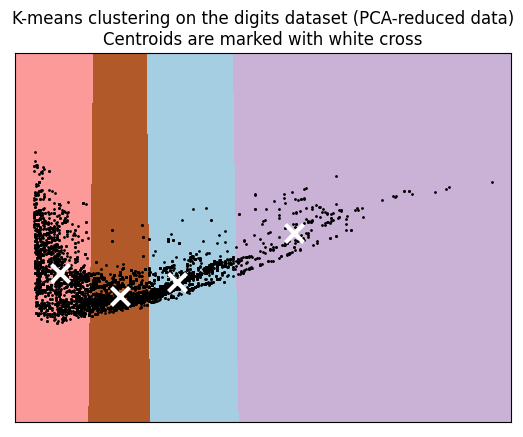

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

reduced_data = PCA(n_components=2).fit_transform(df)
kmeans = KMeans(init="k-means++", n_clusters= 4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
